<center><h1 style="color:#0098E9;"> Capitulo 5: Aproximacion de funciones </h1></center>
<center><h2 style="color:#0098E9;"> Interpolacion </h2></center>
<center><h3 style="color:#0098E9;"> Manuel A. Sánchez</h3></center>
<center><h3 style="color:#0098E9;"> Pontificia Universidad Católica de Chile</h3></center>
<hr style="border:2px solid gray"> </hr>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3)

# Lagrange

In [3]:
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial
from numpy import vander

## Ejemplo: 
$$
x = (-4,2,0,1,3), \quad y = (9,5,1,-1,-5)
$$

In [53]:
# polinomio de Lagrange
def base_Lagrange(j,t,x):
    n = x.size
    Lj = 1.0
    for i in range(n):
        if i != j:
            Lj *= (t-x[i])/(x[j]-x[i])
    return Lj

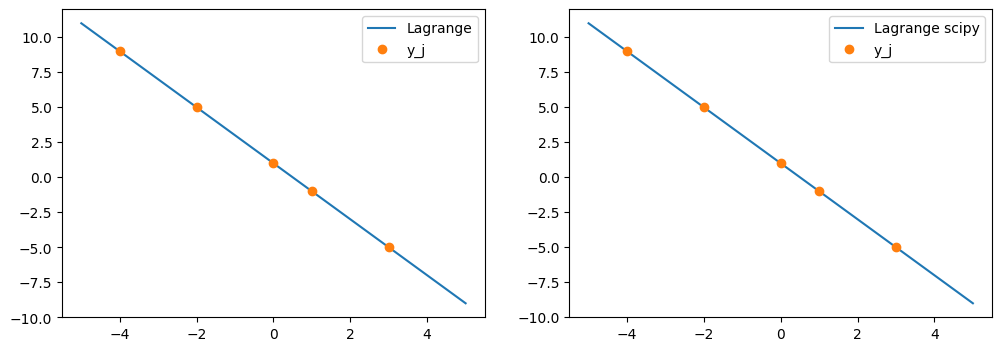

In [54]:
x = np.array([-4.0,-2.0,0,1.0,3.0])

# y = np.array([0.5,1.0,3.0,-1.0,2.0])
y = np.array([9.0,5.0,1.0,-1.0,-5.0])

L0 = lambda t: base_Lagrange(0,t,x)
L1 = lambda t: base_Lagrange(1,t,x)
L2 = lambda t: base_Lagrange(2,t,x)
L3 = lambda t: base_Lagrange(3,t,x)
L4 = lambda t: base_Lagrange(4,t,x)
pn = lambda t: y[0]*L0(t) + y[1]*L1(t) + y[2]*L2(t) + y[3]*L3(t) + y[4]*L4(t)
pn_sp = lagrange(x, y)
fig, ax = plt.subplots(1, 2, figsize=(12,4))
xplot = np.linspace(-5,5,100)
ax[0].plot(xplot, pn(xplot),label='Lagrange')
ax[0].plot(x, y, 'o', label='y_j')
ax[1].plot(xplot, pn_sp(xplot),label='Lagrange scipy')
ax[1].plot(x, y, 'o', label='y_j')
ax[0].legend()
ax[1].legend()
plt.show()

## Matriz de Vandermonde

In [55]:
x = np.array([-4.0,-2.0,0,1.0,3.0])
y = np.array([0.5,1.0,3.0,-1.0,2.0])
# y = np.array([9.0,5.0,1.0,-1.0,-5.0])
n = x.size
V = np.zeros((n,n))
for j in range(n):
    for i in range(n):
        V[i,j] = x[i]**j
print(V)
V_numpy = vander(x, increasing=True)
print(V_numpy)

[[  1.  -4.  16. -64. 256.]
 [  1.  -2.   4.  -8.  16.]
 [  1.   0.   0.   0.   0.]
 [  1.   1.   1.   1.   1.]
 [  1.   3.   9.  27.  81.]]
[[  1.  -4.  16. -64. 256.]
 [  1.  -2.   4.  -8.  16.]
 [  1.   0.   0.   0.   0.]
 [  1.   1.   1.   1.   1.]
 [  1.   3.   9.  27.  81.]]


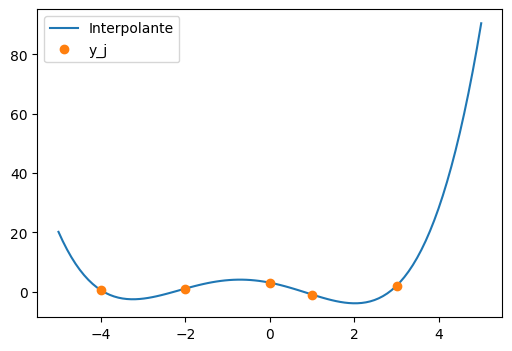

In [56]:
a = np.linalg.solve(V, y)
pn = lambda t: a[0]+a[1]*t + a[2]*t**2 + a[3]*t**3 + a[4]*t**4
fig, ax = plt.subplots(1, 1, figsize=(6,4))
xplot = np.linspace(-5,5,100)
ax.plot(xplot, pn(xplot),label='Interpolante')
ax.plot(x, y, 'o', label='y_j')
ax.legend()
plt.show()

## Ejemplo 1: $f(x) = x^2$

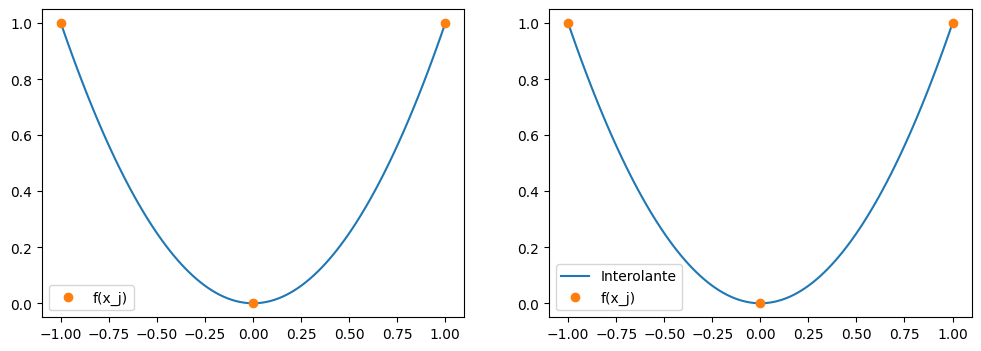

In [57]:
# Interpolation points
a = -1
b = 1
n = 2
x = np.linspace(a,b,n+1)

# function
f = lambda x: x**2

l = lagrange(x,f(x))
V = vander(x, increasing=True)


# Solve the linear system associated to interpolation
sol = np.linalg.solve(V,f(x))

# define interpolant
pn = lambda x: sum([sol[j]*x**j for j in range(n+1)])

fig, axs = plt.subplots(1, 2, figsize=(12,4))
xplot = np.linspace(a,b,100)
axs[0].plot(xplot, l(xplot))
axs[0].plot(x, f(x),'o', label='f(x_j)')
axs[1].plot(xplot, pn(xplot), label='Interolante')
axs[1].plot(x, f(x),'o', label='f(x_j)')
axs[0].legend()
axs[1].legend()
plt.show()

## Ejemplo 2: $f(x) = x^{2/3}$

[-1.    -0.818 -0.636 -0.455 -0.273 -0.091  0.091  0.273  0.455  0.636
  0.818  1.   ]


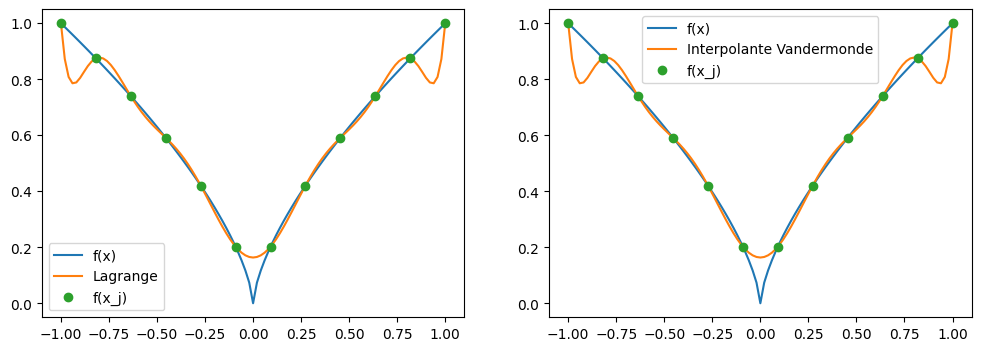

In [59]:
# Interpolation points
a = -1
b = 1
n = 11
x = np.linspace(a,b,n+1)
print(x)
# function
f2 = lambda x: (x**(2.0))**(1.0/3.0)

l = lagrange(x,f2(x))
V = vander(x, increasing=True)


# Solve the linear system associated to interpolation
sol = np.linalg.solve(V,f2(x))

# define interpolant
s2 = lambda x: sum([sol[j]*x**j for j in range(n+1)])

fig, axs = plt.subplots(1, 2, figsize=(12,4))
xplot = np.linspace(a, b, 101)
axs[0].plot(xplot, f2(xplot), label='f(x)')
axs[0].plot(xplot, l(xplot), label='Lagrange')
axs[0].plot(x, f2(x),'o', label='f(x_j)')
axs[0].legend()
axs[1].plot(xplot, f2(xplot), label='f(x)')
axs[1].plot(xplot, s2(xplot), label='Interpolante Vandermonde')
axs[1].plot(x, f2(x),'o', label='f(x_j)')
axs[1].legend()
plt.show()

In [28]:
# Error
error = np.max(np.abs(f2(xplot)-l(xplot)))
print("Error maximo en una malla fina de 101 puntos:", error) 

Error maximo en una malla fina de 101 puntos: 1.4886193254330715


## Ejemplo 3: 
$$f(x) = \cos(x)^3, \quad x\in [-3,3]$$

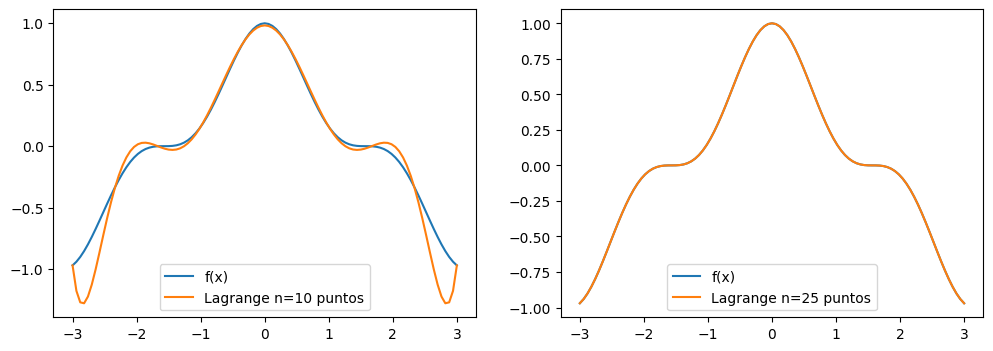

Error maximo de L10 en una malla fina de 101 puntos: 0.42469555865909503
Error maximo de L25 en una malla fina de 101 puntos: 0.0005416108615894366


In [33]:
# Interpolation points
a = -3
b = 3
x10 = np.linspace(a,b,10)
x25 = np.linspace(a,b,25)
# function
f3 = lambda x: np.cos(x)**3
l10 = lagrange(x10,f3(x10))
l25 = lagrange(x25,f3(x25))

fig, axs = plt.subplots(1, 2, figsize=(12,4))
xplot = np.linspace(a, b, 101)
axs[0].plot(xplot, f3(xplot), label='f(x)')
axs[0].plot(xplot, l10(xplot), label='Lagrange n=10 puntos')
axs[0].legend()
axs[1].plot(xplot, f3(xplot),  label='f(x)')
axs[1].plot(xplot, l25(xplot), label='Lagrange n=25 puntos')
axs[1].legend()
plt.show()

# Error
error10 = np.max(np.abs(f3(xplot)-l10(xplot)))
error25 = np.max(np.abs(f3(xplot)-l25(xplot)))
print("Error maximo de L10 en una malla fina de 101 puntos:", error10) 
print("Error maximo de L25 en una malla fina de 101 puntos:", error25) 

## Forma de Newton de un polinomio de interpolacion

**Diferencias divididas.**
Dados los puntos $\{x_0,x_1,...,x_{n}\}$ y la funcion $f(x)$
- $f[x_0] = f(x_0)$
- $\displaystyle f[x_0,x_1] = \frac{f(x_1)-f(x_0)}{x_1-x_0}$
- $\displaystyle f[x_0,x_1,x_2] = \frac{f[x_1,x_2] - f[x_0,x_1]}{x_2-x_0} = \frac{f(x_2)-f(x_1)}{(x_2-x_1)(x_2-x_0)} - \frac{f(x_1)-f(x_0)}{(x_1-x_0)(x_2-x_0)}$
- $\displaystyle f[x_0,x_1,...,x_n] = \frac{f[x_1,x_2,...,x_n] - f[x_0,x_1,...,x_{n-1}]}{x_n-x_0}$

**Forma de Newton**
$$ p_{n}(x) = f[x_0] + f[x_0,x_1](x-x_0) + f[x_0,x_1,x_2](x-x_0)(x-x_1) + ... + f[x_0,...,x_n]W_{n}(x)$$
donde
$$
W_{n}(x) = (x-x_0)(x-x_1)\cdot...\cdot(x-x_{n-1})
$$


In [3]:
def calcular_diferencias_divididas(x, y):
    n = x.size
    coefficients = np.array(y, dtype=float)
    for j in range(1, n):
        for i in range(n - 1, j - 1, -1):
            # Formula: f[x_i, ..., x_{i-j}] = (f[x_i, ...] - f[x_{i-1}, ...]) / (x_i - x_{i-j})
            numerator = coefficients[i] - coefficients[i-1]
            denominator = x[i] - x[i-j]
            if denominator == 0:
                raise ValueError("valores de x duplicados, division por cero.")
            coefficients[i] = numerator / denominator
    return coefficients
    
def W(x):
    n = x.size()
    W = 1.0
    for j in range(n):
        W *= (x-x[j])
    return W

x = np.array([-4.0,-2.0,0,1.0,3.0])
y = np.array([0.5,1.0,3.0,-1.0,2.0])

def Newton_interpolante(x,coefficients,t):
    n = len(coefficients)
    result = coefficients[n-1]
    
    for i in range(n - 2, -1, -1):
        result = coefficients[i] + (t - x[i]) * result
        
    return result
    

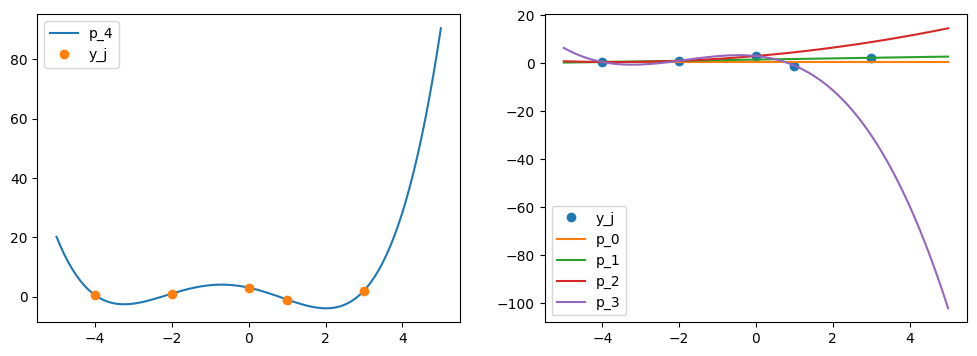

In [51]:
x = np.array([-4.0,-2.0,0,1.0,3.0])
y = np.array([0.5,1.0,3.0,-1.0,2.0])

ff= calcular_diferencias_divididas(x, y)

pn = lambda t: Newton_interpolante(x,ff,t)
p0 = lambda t: ff[0] + 0*t
p1 = lambda t: Newton_interpolante(x[:2], ff[:2],t)
p2 = lambda t: Newton_interpolante(x[:3], ff[:3],t)
p3 = lambda t: Newton_interpolante(x[:4], ff[:4],t)
p4 = lambda t: Newton_interpolante(x[:5], ff[:5],t)
fig, ax = plt.subplots(1, 2, figsize=(12,4))
xplot = np.linspace(-5,5,100)
ax[0].plot(xplot, p4(xplot),label='p_4')
ax[0].plot(x, y, 'o', label='y_j')
# ax[1].plot(xplot, p4(xplot),label='p_4')
ax[1].plot(x, y, 'o', label='y_j')
ax[1].plot(xplot, p0(xplot),label='p_0')
ax[1].plot(xplot, p1(xplot),label='p_1')
ax[1].plot(xplot, p2(xplot),label='p_2')
ax[1].plot(xplot, p3(xplot),label='p_3')

ax[0].legend()
ax[1].legend()
plt.show()

## Polinomios de Tchebychev

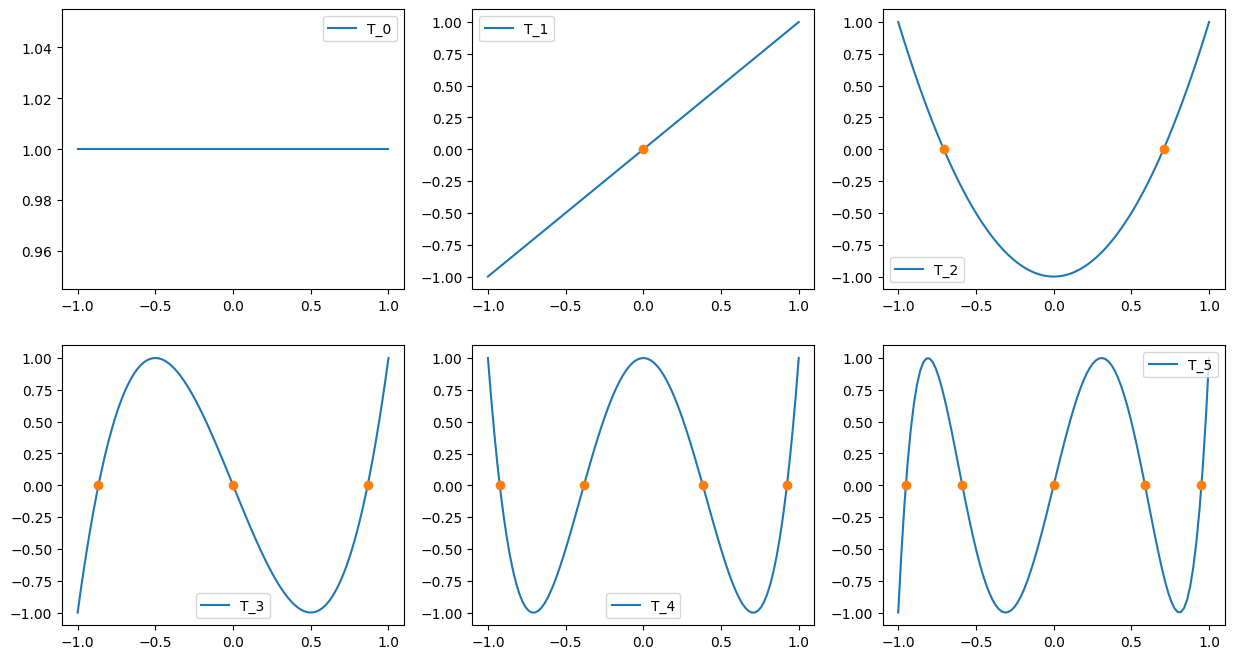

In [4]:
# Tchebyshev zeros T_k
T_0 = lambda x: 1.0 + 0*x
T_1 = lambda x: x
T_2 = lambda x: 2*x*T_1(x) - T_0(x)
T_3 = lambda x: 2*x*T_2(x) - T_1(x)
T_4 = lambda x: 2*x*T_3(x) - T_2(x)
T_5 = lambda x: 2*x*T_4(x) - T_3(x)

fig, axs = plt.subplots(2, 3, figsize=(15,8))
xplot = np.linspace(-1,1,100)
list_plot = [[0,0],[0,1],[0,2],[1,0],[1,1],[1,2]]
T_chev = [T_0, T_1, T_2, T_3, T_4, T_5]
T_label = ['T_0' , 'T_1', 'T_2', 'T_3', 'T_4', 'T_5']
for k in range(6):
    axs[list_plot[k][0],list_plot[k][1]].plot(xplot, T_chev[k](xplot), label = T_label[k])
    axs[list_plot[k][0],list_plot[k][1]].legend()

# zeros en [-1,1]
def Tchebychev_zeros(k):
    z = np.zeros(k)
    for i in range(k):
        z[i] = np.cos((2.0*i+1)*np.pi/(2.0*k)) 
    return z

# zeros 
for k in range(1,6):
    z = Tchebychev_zeros(k)
    axs[list_plot[k][0], list_plot[k][1]].plot(z, T_chev[k](z),'o')

plt.show()

## Ejemplo: 
Interpolacion usando las **raices de polinomios de Tchebychev** $f(x) = x^{2/3},\;x\in[-1,1]$ 

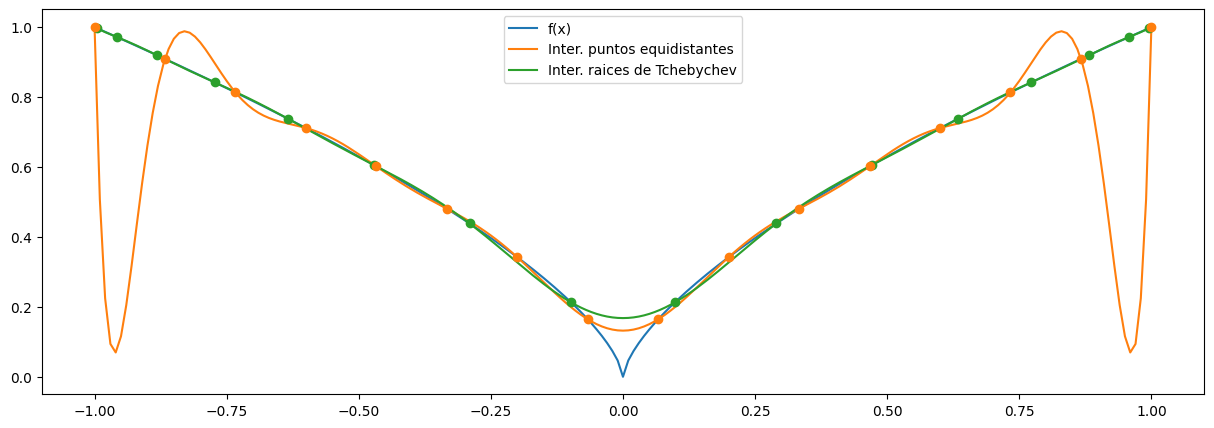

In [60]:
# Interpolation points
a = -1
b = 1
n = 15
x = np.linspace(a,b,n+1)

# function
f2 = lambda x: (x**(2.0))**(1.0/3.0)

# Vandermonde Matrix
V = vander(x, increasing=True)
np.set_printoptions(precision=3)
# linear system equidistant points
sol2 = np.linalg.solve(V,f2(x))
s2 = lambda x: sum([sol2[j]*x**j for j in range(n+1)]) 

# linear system Tchebychev points
z = Tchebychev_zeros(n+1)
Vz = vander(z, increasing=True)
sol2_T = np.linalg.solve(Vz,f2(z))
s2_T = lambda x: sum([sol2_T[j]*x**j for j in range(n+1)])
fig, axs = plt.subplots(1, 1, figsize=(15,5))
xplot = np.linspace(a, b, 201)
axs.plot(xplot, f2(xplot), color= 'C00')
axs.plot(xplot, s2(xplot), color='C01')
axs.plot(xplot, s2_T(xplot), color ='C02')
axs.plot(z, f2(z), 'o', color='C02')
axs.plot(x, f2(x), 'o', color='C01')
axs.legend(['f(x)','Inter. puntos equidistantes','Inter. raices de Tchebychev'])
plt.show()

## Ejemplo 4: 
Error de interpolacion con polinomios de Tchebychev
$f(x) = exp(3x)$

$$\|f-p_4\|_\infty \leq \frac{\|f^{(5)}\|_\infty}{5!}\|W_4(X)\|_\infty = 4.64 (\text{equidistantes}) \text{ o } 2.54 (\text{Tchebychev}) $$

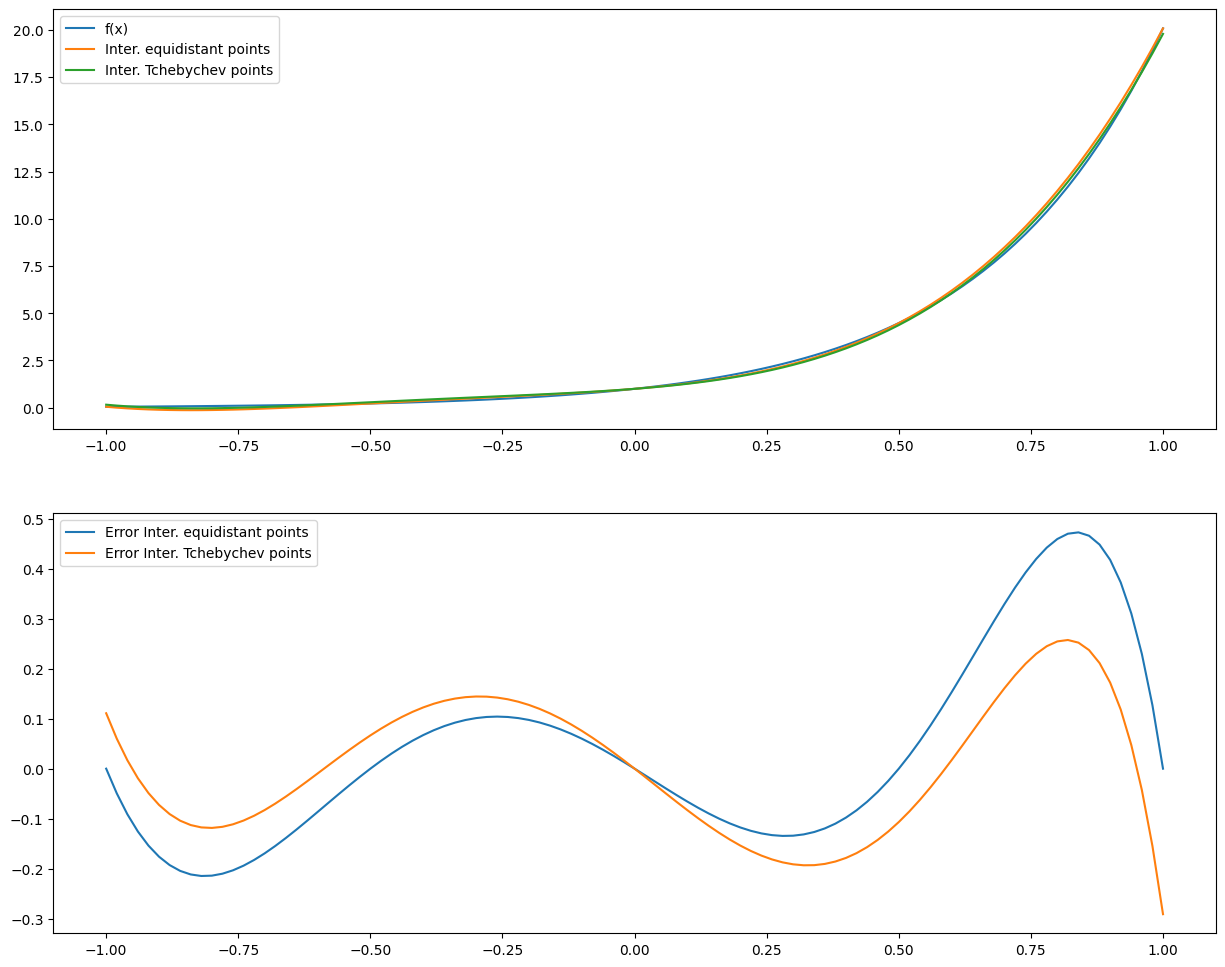

Error using equidistant points at 0.8: 0.45910505807948
Error using Tchebychev points at 0.8: 0.25439660001005926


In [48]:
f4 = lambda x: np.exp(3*x)
n = 4
# Equidistant points
x = np.linspace(-1, 1, n+1)
V = vander(x, increasing=True)
sol4 = np.linalg.solve(V,f4(x))
s4 = lambda x: sum([sol4[j]*x**j for j in range(n+1)]) #lambda t: InterpolantMonomial(t,sol4)

# Tchebychev poitns
z = Tchebychev_zeros(n+1)
Vz = vander(z,  increasing=True)
sol4_T = np.linalg.solve(Vz,f4(z))
s4_T = lambda x: sum([sol4_T[j]*x**j for j in range(n+1)]) #lambda t: InterpolantMonomial(t,sol4_T)

# plots
fig, axs = plt.subplots(2, 1, figsize=(15,12))
xplot = np.linspace(-1, 1, 101)
axs[0].plot(xplot, f4(xplot))
axs[0].plot(xplot, s4(xplot))
axs[0].plot(xplot, s4_T(xplot))
axs[0].legend(['f(x)','Inter. equidistant points','Inter. Tchebychev points'])


axs[1].plot(xplot, (f4(xplot)-s4(xplot)))
axs[1].plot(xplot, (f4(xplot)-s4_T(xplot)))
axs[1].legend(['Error Inter. equidistant points','Error Inter. Tchebychev points'])
plt.show()


print("Error using equidistant points at 0.8:", abs(f4(0.8) - s4(0.8)))
print("Error using Tchebychev points at 0.8:", abs(f4(0.8) - s4_T(0.8)))

## Example 3: $f(x) = cos(x)^3$ with Tchebychev

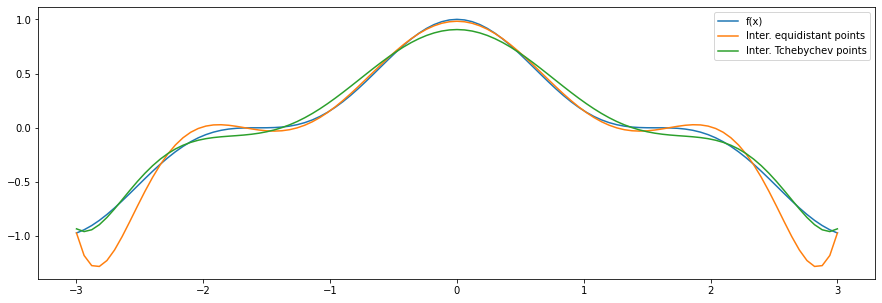

In [46]:
# Interpolation points
a = -3
b = 3
n = 9
x = np.linspace(a,b,n+1)

# function
f3 = lambda x: np.cos(x)**3


# Vandermonde Matrix
V = vander(x, increasing=True)
np.set_printoptions(precision=3)
# linear system equidistant points
sol3 = np.linalg.solve(V,f3(x))
s3 = lambda x: sum([sol3[j]*x**j for j in range(n+1)]) 

# linear system tchebychev points
zt = Tchebychev_zeros(n+1)
z = (b-a)*zt/2+(b-a)/2 + a
Vz = vander(z, increasing=True)
sol3_T = np.linalg.solve(Vz,f3(z))
s3_T =lambda x: sum([sol3_T[j]*x**j for j in range(n+1)]) 
fig, axs = plt.subplots(1, 1, figsize=(15,5))
xplot = np.linspace(a, b, 101)
axs.plot(xplot, f3(xplot))
axs.plot(xplot, s3(xplot))
axs.plot(xplot, s3_T(xplot))
axs.legend(['f(x)','Inter. equidistant points','Inter. Tchebychev points'])
plt.show()

## Example 5: Runge function

$$
f(x) = \frac{1}{1+25x^{2}}
$$

Comparison equidistant points vs Tchebychev points.

Interpolation with equdistant points diver

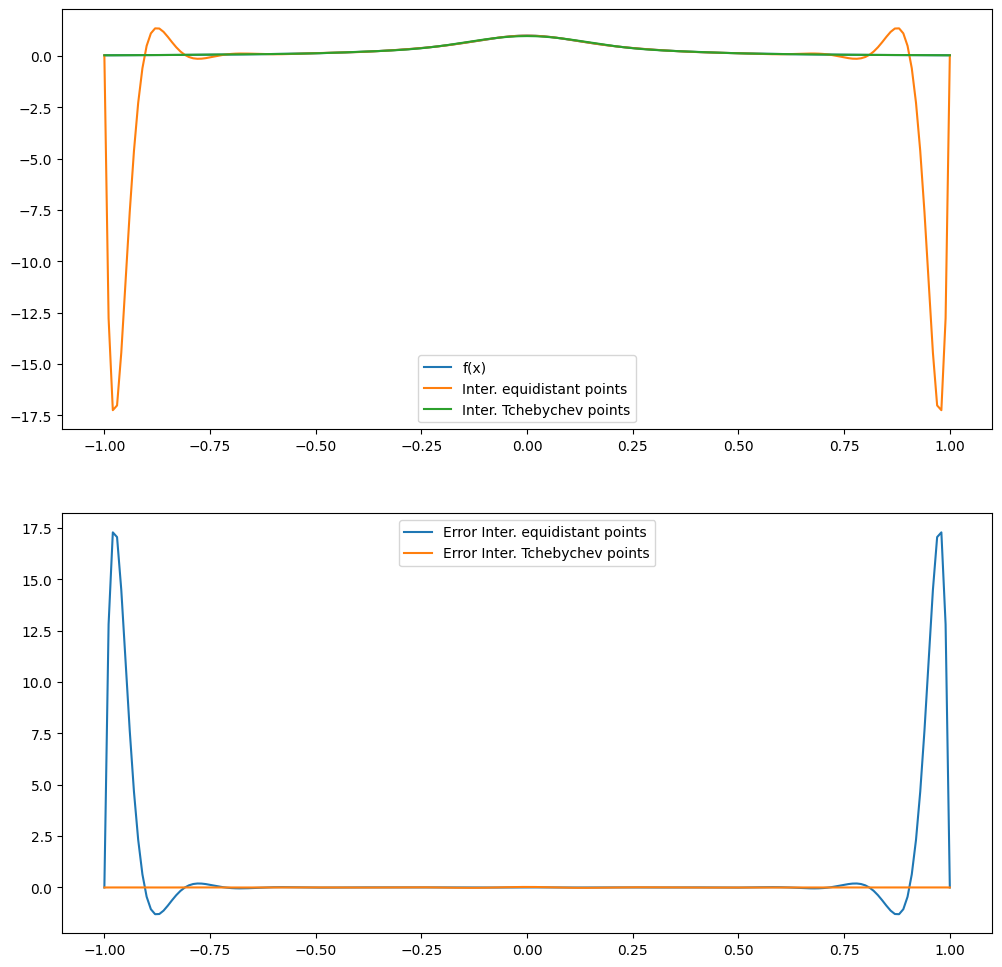

In [7]:
f_runge = lambda x: 1.0/(1.0+25*x**2)
n = 21
# interpolation with equidistant points
x = np.linspace(-1, 1, n+1)
V = vander(x, increasing=True)
sol_runge = np.linalg.solve(V,f_runge(x))
s_runge = lambda x: sum([sol_runge[j]*x**j for j in range(n+1)])#lambda t: InterpolantMonomial(t,sol_runge)

# interpolation with Tchebychev points
z = Tchebychev_zeros(n+1)
Vz = vander(z, increasing=True)
sol_rungeT = np.linalg.solve(Vz,f_runge(z))
s_rungeT = lambda x: sum([sol_rungeT[j]*x**j for j in range(n+1)])#lambda t: InterpolantMonomial(t,sol_rungeT)

# plots
fig, axs = plt.subplots(2, 1, figsize=(12,12))
xplot = np.linspace(-1, 1, 201)
axs[0].plot(xplot, f_runge(xplot))
axs[0].plot(xplot, s_runge(xplot))
axs[0].plot(xplot, s_rungeT(xplot))
axs[0].legend(['f(x)','Inter. equidistant points','Inter. Tchebychev points'])


axs[1].plot(xplot, f_runge(xplot)-s_runge(xplot))
axs[1].plot(xplot, f_runge(xplot)-s_rungeT(xplot))
axs[1].legend(['Error Inter. equidistant points','Error Inter. Tchebychev points'])
#plt.show()


In [16]:
from sympy import *
x = symbols('x')
f = 1/(1+25*x**2)
f_der = f

n = 11
t0 = 0.1
for j in range(1,n+2):
    f_der = diff(f_der,x)
    f_der_at0 = f_der.subs(x,t0)
    #print("f^(n+1):", f_der_at0)
    h = 2/(j+1)
    C = h**(j+1)/(4*(j+1))
    #print("C:", C)
    print("C*f^(", j,")", C*f_der_at0)


C*f^( 1 ) -0.400000000000000
C*f^( 2 ) -0.158024691358025
C*f^( 3 ) 1.80000000000000
C*f^( 4 ) -2.98844160000000
C*f^( 5 ) -3.86282578875170
C*f^( 6 ) 28.4434921517673
C*f^( 7 ) -41.3437500000001
C*f^( 8 ) -108.825281587005
C*f^( 9 ) 592.830309335041
C*f^( 10 ) -640.639235496136
C*f^( 11 ) -3222.24051211706
C*f^( 12 ) 13798.1963526921


## Hermite interpolation

### Ejemplo. (Burden p.101)

p(x) = 
                        5                       4                       3                      2                        ↪
- 0.00277469135833286⋅x  + 0.0240317901259459⋅x  - 0.0145560802540103⋅x  - 0.235216169739715⋅x  - 0.00822922346696942⋅ ↪

↪                     
↪ x + 1.00194406469441


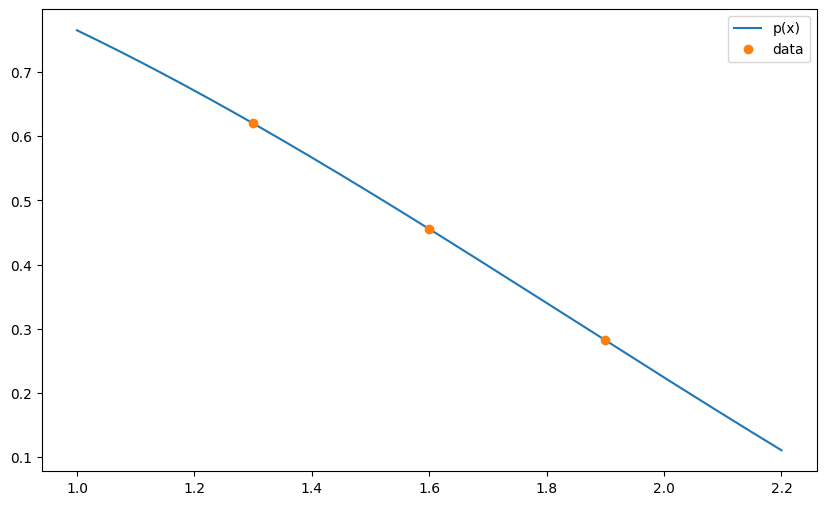

In [17]:
from sympy import *
x = symbols('x')
xi  = [1.3,1.6,1.9]
fi  = [0.6200860, 0.4554022, 0.2818186]
dfi = [-0.5220232, -0.5698959, -0.5811571]

# Lagrange polynomials
l0 = (x-xi[1])*(x-xi[2])/((xi[0]-xi[1])*(xi[0]-xi[2]))
l1 = (x-xi[0])*(x-xi[2])/((xi[1]-xi[0])*(xi[1]-xi[2]))
l2 = (x-xi[1])*(x-xi[0])/((xi[2]-xi[0])*(xi[2]-xi[1]))

dl0 = diff(l0,x)
dl1 = diff(l1,x)
dl2 = diff(l2,x)

dl0atx0 = dl0.subs(x,xi[0])
dl1atx1 = dl1.subs(x,xi[1])
dl2atx2 = dl2.subs(x,xi[2])

# H
H0 = (1-2*(x-xi[0])*dl0atx0)*l0**2
H1 = (1-2*(x-xi[1])*dl1atx1)*l1**2
H2 = (1-2*(x-xi[2])*dl2atx2)*l2**2

# Hhat
Hhat0 = (x-xi[0])*l0**2
Hhat1 = (x-xi[1])*l1**2
Hhat2 = (x-xi[2])*l2**2

p = fi[0]*H0 + fi[1]*H1 + fi[2]*H2 + dfi[0]*Hhat0 + dfi[1]*Hhat1 + dfi[2]*Hhat2

init_printing()
print("p(x) = \n", pretty(simplify(p)))

#print(p.subs(x,1.5))


np.set_printoptions(precision=3)
fig, axs = plt.subplots(1, 1, figsize=(10,6))
xplot = np.linspace(1, 2.2, 200)
pplot = [p.subs(x, xplot[i]) for i in range(xplot.size)]
axs.plot(xplot, pplot)
axs.plot(xi, fi, 'o')
axs.legend(['p(x)', 'data'])


## Interpolacion por trozos

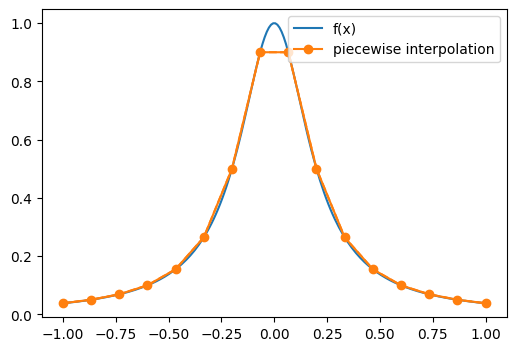

In [25]:
f_runge = lambda x: 1.0/(1.0+25*x**2)
n = 15
# interpolation with equidistant points
x = np.linspace(-1, 1, n+1)

fig, axs = plt.subplots(1, 1, figsize=(6,4))
xplot = np.linspace(-1, 1, 200)

If = lambda t: np.interp(t, x, f_runge(x))
axs.plot(xplot, f_runge(xplot))
axs.plot(x, If(x), 'C01', marker='o')
axs.plot(xplot, If(xplot), '--')
axs.legend(['f(x)', 'piecewise interpolation'])

## Spline cubica

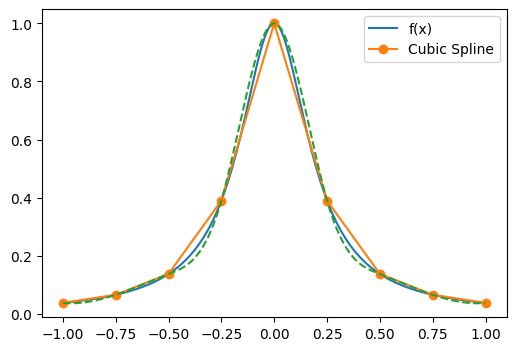

In [26]:
from scipy.interpolate import CubicSpline
f_runge = lambda x: 1.0/(1.0+25*x**2)
n = 8
# interpolation with equidistant points
x = np.linspace(-1, 1, n+1)

fig, axs = plt.subplots(1, 1, figsize=(6,4))
xplot = np.linspace(-1, 1, 200)

S = CubicSpline( x, f_runge(x))
axs.plot(xplot, f_runge(xplot))
axs.plot(x, S(x), marker='o')
axs.plot(xplot, S(xplot), '--')
axs.legend(['f(x)', 'Cubic Spline'])



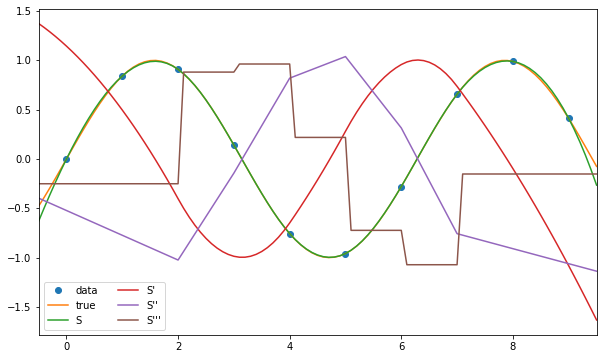

In [9]:
x = np.arange(10)
y = np.sin(x)
S = CubicSpline( x, y)
fig, ax = plt.subplots(1, 1, figsize=(10,6))
xplot = np.arange(-0.5, 9.6, 0.1)
ax.plot(x, y, 'o', label='data')
ax.plot(xplot, np.sin(xplot), label='true')
ax.plot(xplot, S(xplot), label="S")
ax.plot(xplot, S(xplot, 1), label="S'")
ax.plot(xplot, S(xplot, 2), label="S''")
ax.plot(xplot, S(xplot, 3), label="S'''")
ax.set_xlim(-0.5, 9.5)
ax.legend(loc='lower left', ncol=2)
plt.show()

##  Example 'duck' (Burden p. 118) 

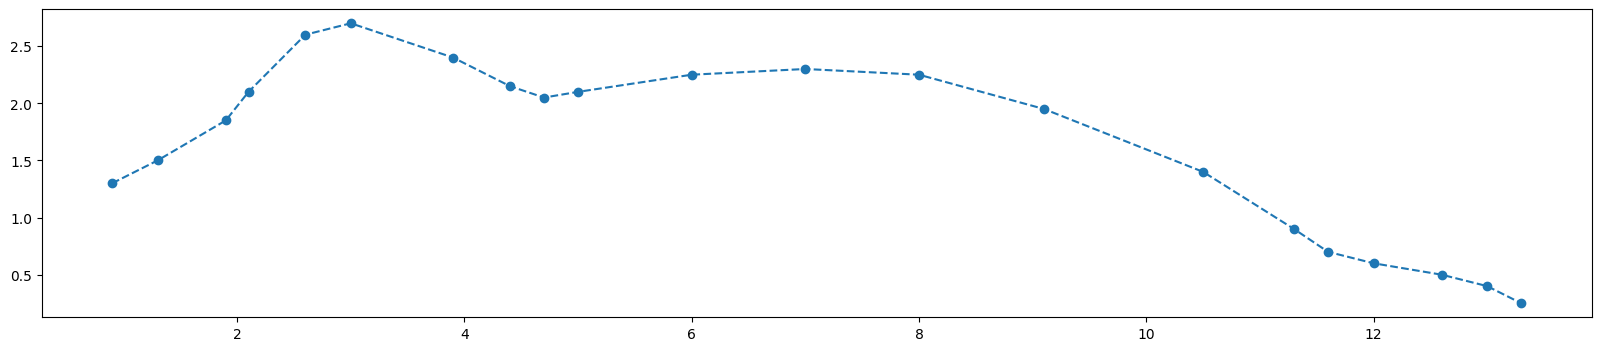

In [21]:
x = [0.9, 1.3, 1.9 , 2.1, 2.6, 3.0, 3.9, 4.4 , 4.7 , 5.0, 6.0 , 7.0, 8.0 , 9.1, 10.5, 11.3, 11.6, 12.0, 12.6,13.0,13.3]
y = [1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7 , 0.6 , 0.5 , 0.4 , 0.25]
fig, ax = plt.subplots(1, 1, figsize=(20,4))
plt.plot(x,y,'o--')
#ax.set_ylim(-6, 4)

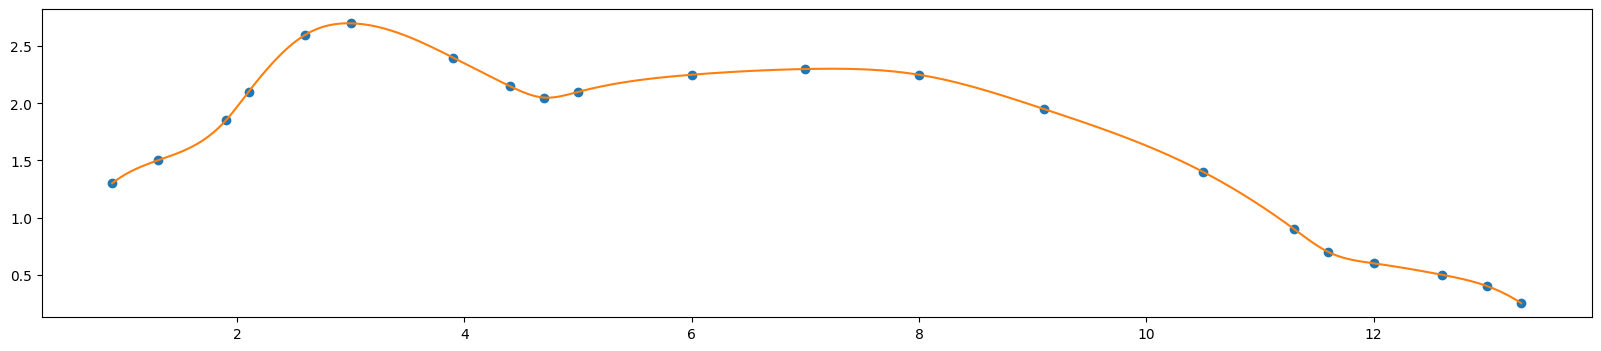

In [22]:
# Spline
S = CubicSpline( x, y)
fig, ax = plt.subplots(1, 1, figsize=(20,4))
xplot = np.linspace(x[0], x[-1], 400)
ax.plot(x, y, 'o', label='data')
ax.plot(xplot, S(xplot), label="S")

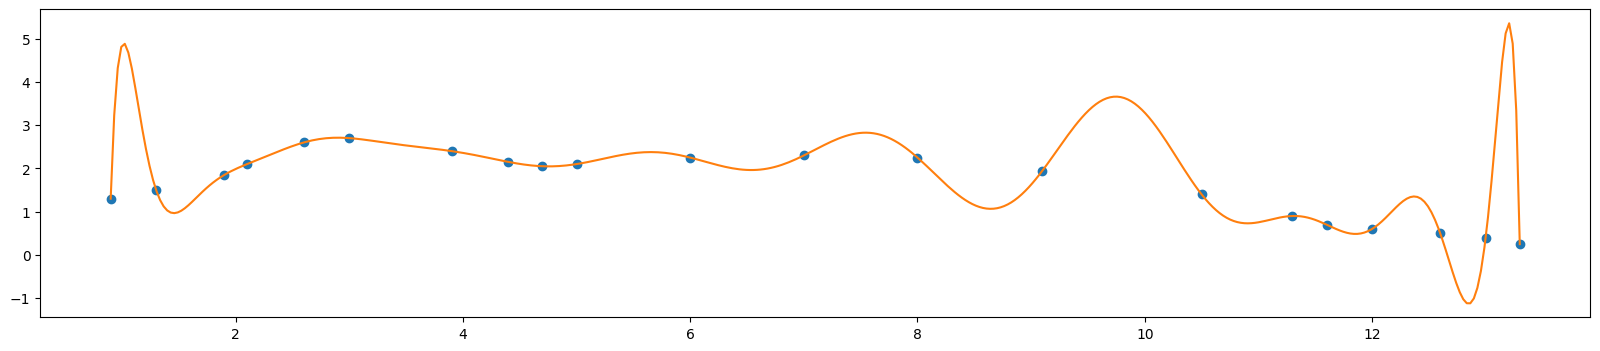

In [24]:
from scipy.interpolate import BarycentricInterpolator
In = BarycentricInterpolator(x,y)
fig, ax = plt.subplots(1, 1, figsize=(20,4))
xplot = np.linspace(x[0], x[-1], 400)
ax.plot(x, y, 'o', label='data')
ax.plot(xplot, In(xplot), label="S")

## Example: Airfoil
![sdf](airfoil_plane.png) 

![sdfs](airfoil_physics.jpg)

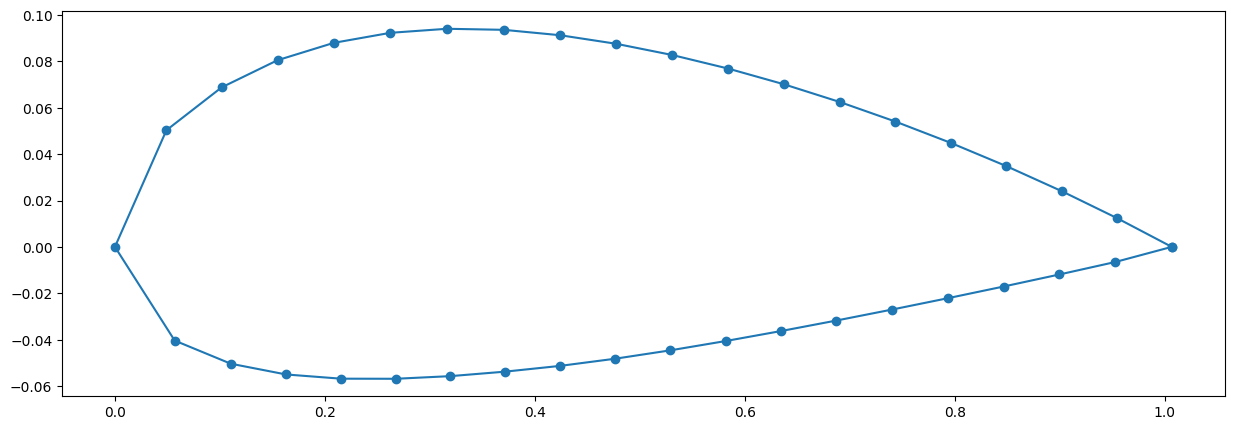

In [4]:
# airfoil NACA 4-digit series, NACA 2415 airfoil 
filename = 'airfoil_NACA2415.dat'
header = "parameter s, X-Column, Y-Column"
data = np.loadtxt(filename)
s = data[:, 0]
x_air = data[:, 1]
y_air = data[:, 2]

fig, axs = plt.subplots(1, 1, figsize=(15,5))
axs.plot(x_air, y_air,'o-')
plt.show()


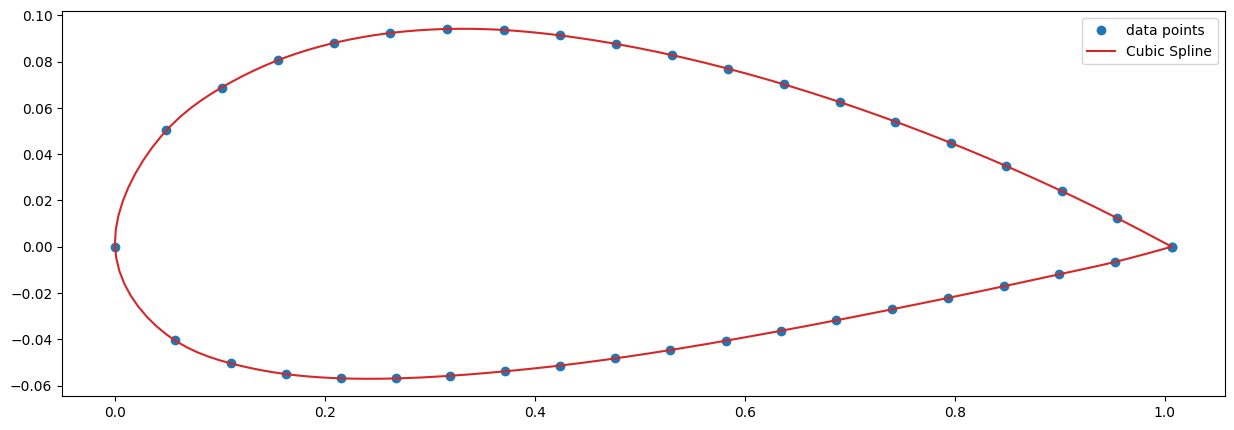

In [27]:
CS_airfoil = CubicSpline(s,np.c_[x_air,y_air], bc_type='natural')
xplot = np.linspace(0, np.max(s), 200)
fig, axs = plt.subplots(1, 1, figsize=(15,5))
axs.plot(x_air, y_air,'o')
axs.plot(CS_airfoil(xplot)[:,0], CS_airfoil(xplot)[:,1], 'C03')
axs.legend(['data points','Cubic Spline'])



## Aproximacion por minimos cuadrados

In [7]:
x = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
y = np.array([0.35,0.5,0.45, 0.55, 0.6,0.1,0.9,0.75,0.8,0.8])

In [16]:

A = V_numpy = vander(x, increasing=True, N=2)
a = np.linalg.solve(A.T.dot(A),A.T.dot(y))
print(a)

[0.307 0.497]


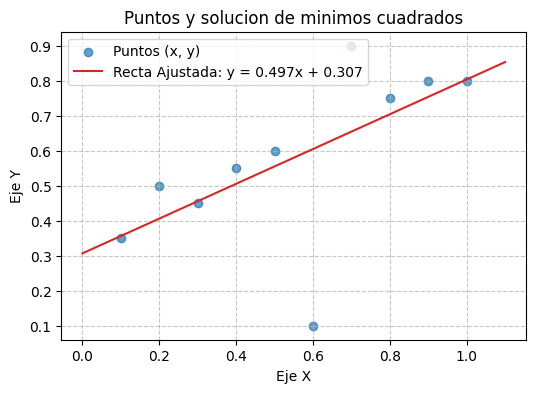

In [23]:
p = lambda x: a[0]+a[1]*x

plt.figure(figsize=(6, 4))
plt.scatter(x, y, marker='o',alpha=0.7, label='Puntos (x, y)')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')

y_recta = [p(0), p(1.1)]
plt.plot([0,1.1], y_recta, color='C03',linestyle='-', label=f'Recta Ajustada: y = {a[1]:.3f}x + {a[0]:.3f}')

plt.title('Puntos y solucion de minimos cuadrados')

plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)


plt.show()

## Polinomios ortogonales

In [40]:
from scipy.integrate import quad
def norma_L2(u,a=-1,b=1):
    def integrando_cuadrado(x):
        return u(x)**2
    integral_resultado, error = quad(integrando_cuadrado, a, b)
    return np.sqrt(integral_resultado)

def pi_L2(u,v,a=-1,b=1): # producto interior L2
    def integrando(x):
        return u(x)*v(x)
    integral_resultado, error = quad(integrando, a, b)
    return integral_resultado

In [54]:
# base de monomios
p0 = lambda x: 1.0 + 0*x
p1  =lambda x: x
p2  =lambda x: x**2

u1 = lambda x: p0(x)
v1 = lambda x: u1(x)/norma_L2(u1)

u2 = lambda x: p1(x) - pi_L2(p1,v1)*v1(x)
v2 = lambda x: u2(x)/norma_L2(u2)

u3 = lambda x: p2(x) - pi_L2(p2,v1)*v1(x)- pi_L2(p2,v2)*v2(x)
v3 = lambda x: u3(x)/norma_L2(u3)

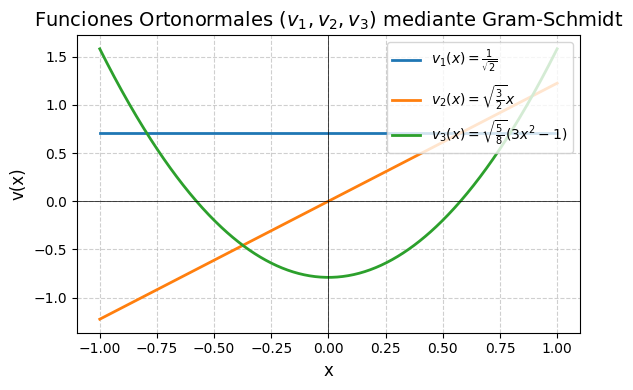

In [57]:
x_vals = np.linspace(-1, 1, 500)
v1_vals = v1(x_vals)
v2_vals = v2(x_vals)
v3_vals = v3(x_vals)

plt.figure(figsize=(6, 4))
plt.plot(x_vals, v1_vals, label='$v_1(x) = \\frac{1}{\\sqrt{2}}$', linestyle='-', linewidth=2)
plt.plot(x_vals, v2_vals, label='$v_2(x) = \\sqrt{\\frac{3}{2}} x$', linestyle='-', linewidth=2)
plt.plot(x_vals, v3_vals, label='$v_3(x) = \\sqrt{\\frac{5}{8}} (3x^2 - 1)$', linestyle='-', linewidth=2)

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

plt.title('Funciones Ortonormales ($v_1, v_2, v_3$) mediante Gram-Schmidt', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('v(x)', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show() 

## Aproximacion de $f(x) = \sin(3x)$

In [99]:
f = lambda x: np.sin(3*x)
v1 = lambda x: 1.0/np.sqrt(2.0)+0*x
v2 = lambda x: np.sqrt(3.0/2.0)*x
v3 = lambda x: np.sqrt(5.0/8.0)*(3*x**2-1)
v4 = lambda x: 1.0/2.0*(5*x**3-3*x)/np.sqrt((2/(2*3+1)))
v5 = lambda x: 1.0/8.0*(35*x**4-30*x**2+3)/np.sqrt(2/(2*4+1))
v6 = lambda x: 1.0/8.0*(63*x**5-70*x**3+15*x)/np.sqrt(2/(2*5+1))
fv1 = pi_L2(f, v1)
fv2 = pi_L2(f, v2)
print(np.sqrt(3.0/2.0)*fv2, 3/2*(2/9*np.sin(3) - 2/3*np.cos(3)) )
fv3 = pi_L2(f, v3)
fv4 = pi_L2(f, v4)
fv5 = pi_L2(f, v5)
fv6 = pi_L2(f, v6)
Pf_1 = lambda x: fv1*v1(x)
Pf_2 = lambda x: Pf_1(x) + fv2*v2(x)
Pf_3 = lambda x: Pf_2(x) + fv3*v3(x)
Pf_4 = lambda x: Pf_3(x) + fv4*v4(x)
Pf_5 = lambda x: Pf_4(x) + fv5*v5(x)
Pf_6 = lambda x: Pf_5(x) + fv6*v6(x)

1.0370324992870676 1.0370324992870676


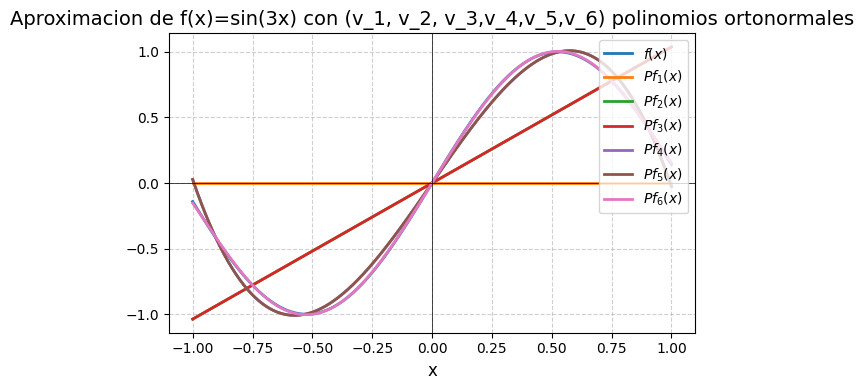

In [83]:
x_vals = np.linspace(-1, 1, 500)

plt.figure(figsize=(6, 4))
plt.plot(x_vals, f(x_vals), label='$f(x)$', linestyle='-', linewidth=2)
plt.plot(x_vals, Pf_1(x_vals), label='$Pf_1(x)$', linestyle='-', linewidth=2)
plt.plot(x_vals, Pf_2(x_vals), label='$Pf_2(x)$', linestyle='-', linewidth=2)
plt.plot(x_vals, Pf_3(x_vals), label='$Pf_3(x)$', linestyle='-', linewidth=2)
plt.plot(x_vals, Pf_4(x_vals), label='$Pf_4(x)$', linestyle='-', linewidth=2)
plt.plot(x_vals, Pf_5(x_vals), label='$Pf_5(x)$', linestyle='-', linewidth=2)
plt.plot(x_vals, Pf_6(x_vals), label='$Pf_6(x)$', linestyle='-', linewidth=2)

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

plt.title('Aproximacion de f(x)=sin(3x) con (v_1, v_2, v_3,v_4,v_5,v_6) polinomios ortonormales', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show() 

## Aproximacion de Taylor centrada en $x = 0$ de $\sin(3x)$
\begin{align*}
t_0(x) &= 0 \\
t_1(x) &= 0 + 3x \\
t_2(x) &= 0 + 3x + 0 \\
t_3(x) &= 0 + 3x + 0 + \frac{27}{6}x^{3} 
\end{align*}

In [85]:
t0 = lambda x: 0
t1 = lambda x: 3*x
t2 = lambda x: 3*x
t3 = lambda x: 3*x + 9/2*x**3

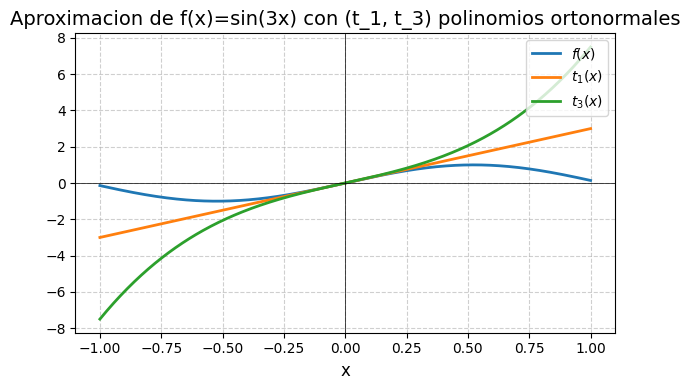

In [88]:
x_vals = np.linspace(-1, 1, 500)

plt.figure(figsize=(6, 4))
plt.plot(x_vals, f(x_vals), label='$f(x)$', linestyle='-', linewidth=2)
plt.plot(x_vals, t1(x_vals), label='$t_1(x)$', linestyle='-', linewidth=2)
plt.plot(x_vals, t3(x_vals), label='$t_3(x)$', linestyle='-', linewidth=2)

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

plt.title('Aproximacion de f(x)=sin(3x) con (t_1, t_3) polinomios ortonormales', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show() 

In [91]:
error_taylor_1 = lambda x: (f(x) - t1(x))
error_legendre_1 = lambda x: (f(x) - Pf_1(x))
et1 = norma_L2(error_taylor_1)
ePf1 = norma_L2(error_legendre_1)
print(et1, ePf1)

1.7024803236899833 1.023019672195907


In [110]:
from scipy.special import legendre
def poly_orthonormal(n):
    u = legendre(n)
    v = u/np.sqrt(2.0/(2.0*n+1.0))
    return v
def get_coefficient_projector(f,n):
    coeff = np.zeros(n+1)
    Pflist = []
    for i in range(n+1):
        v = poly_orthonormal(i)
        coeff[i] = pi_L2(f, v)
    return coeff
def eval_projection(x,f,n):
    coeff = get_coefficient_projector(f,n)
    return sum([coeff[i]*poly_orthonormal(i)(x) for i in range(n+1)])
x = 0.5
eval_projection(x,lambda x: np.sin(3*x), 2)

0.5185162496435338

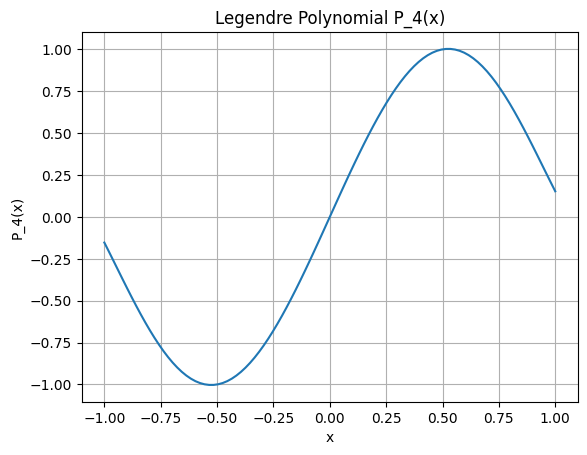

In [113]:
x_values = np.linspace(-1, 1, 100)
y_values = eval_projection(x_values,lambda x: np.sin(3*x), n=5)

# Plot the polynomial
plt.plot(x_values, y_values)
plt.title("Legendre Polynomial P_4(x)")
plt.xlabel("x")
plt.ylabel("P_4(x)")
plt.grid(True)
plt.show()


In [105]:
import numpy as np
from scipy.special import legendre
from scipy.integrate import quad

# --- Tu función a aproximar ---
f = lambda x: np.sin(3*x)

# 1. Producto Interior
def pi_L2(f, g):
    # La multiplicación de la función (f) y el objeto Polinomio (g)
    # dentro de la lambda es la fuente del error si no se maneja bien.
    # Esta forma debería ser segura para scipy.integrate.quad:
    integrand = lambda x: f(x) * g(x)
    
    # quad devuelve (valor_integral, error_estimado)
    integral_value, _ = quad(integrand, -1, 1)
    return integral_value

# 2. Polinomios Ortonormales
def poly_orthonormal(n):
    u = legendre(n) # u es el objeto Polinomio de Legendre P_n(x)
    norm = np.sqrt(2.0 / (2.0 * n + 1.0))
    v = u / norm  # v es el objeto Polinomio Ortonormal phi_n(x)
    return v

# 3. Función de Aproximación Completa
def aproximacion(f, n):
    coeff = np.zeros(n + 1)
    S_n = 0 # Inicializamos como el polinomio cero
    
    for i in range(n + 1):
        phi_i = poly_orthonormal(i)
        
        # Calcular el coeficiente: a_i = <f, phi_i>
        coeff[i] = pi_L2(f, phi_i) 
        
        # Construir la aproximación: S_n = S_n + a_i * phi_i
        S_n = S_n + coeff[i] * phi_i
        
    return S_n, coeff

# --- Ejemplo de Ejecución ---
grado_maximo = 5 
S_n_poly, coeficientes = aproximacion(f, grado_maximo)

print(f"Coeficientes de Fourier (a_0 a a_{grado_maximo}):\n{coeficientes}")
print(f"Aproximación en x=0.5: {S_n_poly(0.5)}")

ValueError: operands could not be broadcast together with shapes (2,) (3,) 

In [19]:
def eval_cubic_bezier(P0, P1, P2, P3, t_vals): # Evalúa la curva de Bézier Cúbica
    return ((1-t_vals)**3*P0+3*(1-t_vals)**2*t_vals*P1+3*(1-t_vals)*t_vals**2*P2+t_vals**3*P3)
def eval_quadratic_bezier(P0, P1, P2, t_vals): # Evalúa la curva de Bézier Cuadrática
    return ((1-t_vals)**2*P0+2*(1-t_vals)*t_vals*P1+t_vals**2*P2)

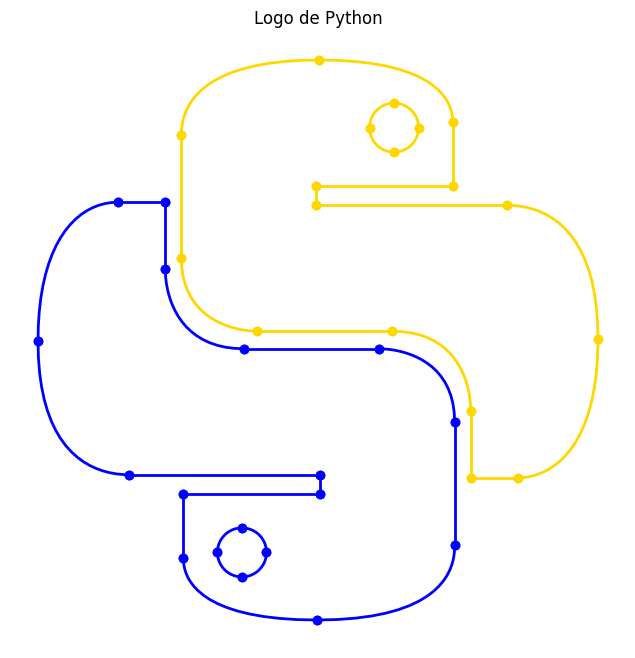

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from svgpathtools import svg2paths, CubicBezier, QuadraticBezier, Line

SVG_FILE = "Python-logo-notext.svg"
NUM_POINTS = 20  
t_vals = np.linspace(0, 1, NUM_POINTS)
try:
    paths, attributes = svg2paths(SVG_FILE)
except FileNotFoundError:
    print(f"Error: No se encontró el archivo '{SVG_FILE}'. Asegúrate de que esté en el directorio correcto.")
    exit()

plt.figure(figsize=(8, 8))
plt.title(f"Logo de Python")
plt.gca().set_aspect('equal', adjustable='box')
plt.axis('off')

for path_index, path in enumerate(paths):
    color = 'blue' if path_index == 0 else 'gold' 
    for segment in path:
        if isinstance(segment, CubicBezier):
            P0, P1, P2, P3 = segment.start, segment.control1, segment.control2, segment.end
            points = eval_cubic_bezier(P0, P1, P2, P3, t_vals)
            plt.plot(points.real, points.imag, color=color, linewidth=2)
            plt.plot([P0.real, P3.real], [P0.imag, P3.imag], 'o', color=color)
        elif isinstance(segment, QuadraticBezier):
            P0, P1, P2 = segment.start, segment.control, segment.end
            points = eval_quadratic_bezier(P0, P1, P2, t_vals)
            plt.plot(points.real, points.imag, color=color, linewidth=2)
        elif isinstance(segment, Line):
            P0, P1 = segment.start, segment.end
            plt.plot([P0.real, P1.real], [P0.imag, P1.imag], 'o', color=color)
            plt.plot([P0.real, P1.real], [P0.imag, P1.imag], color=color, linewidth=2)
plt.show()

[Path(CubicBezier(start=(512.857+36.99j), control1=(509.95899999999995+37.437000000000005j), control2=(507.17299999999994+48.108000000000004j), end=(501.57199999999995+53.667j)),
     CubicBezier(start=(501.57199999999995+53.667j), control1=(497.47599999999994+57.679j), control2=(492.36299999999994+57.428000000000004j), end=(489.64699999999993+62.388000000000005j)),
     CubicBezier(start=(489.64699999999993+62.388000000000005j), control1=(488.61599999999993+64.241j), control2=(488.94999999999993+67.40400000000001j), end=(487.7799999999999+70.441j)),
     CubicBezier(start=(487.7799999999999+70.441j), control1=(485.4949999999999+76.515j), control2=(477.4429999999999+77.058j), end=(477.4429999999999+83.676j)),
     CubicBezier(start=(477.4429999999999+83.676j), control1=(477.4149999999999+90.82300000000001j), control2=(484.1579999999999+92.188j), end=(489.99499999999995+97.259j)),
     CubicBezier(start=(489.99499999999995+97.259j), control1=(494.55099999999993+101.341j), control2=(494.

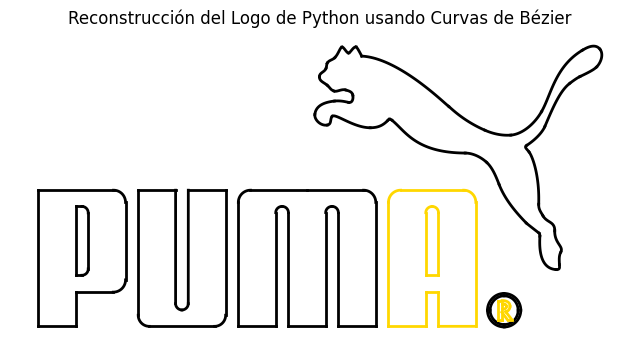

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from svgpathtools import svg2paths, CubicBezier, QuadraticBezier, Line

# -------------------------------------------------------------
# I. FUNCIONES MATEMÁTICAS (Bézier)
# -------------------------------------------------------------

def eval_cubic_bezier(P0, P1, P2, P3, t_vals):
    """Evalúa la curva de Bézier Cúbica."""
    return ((1 - t_vals)**3 * P0 + 3 * (1 - t_vals)**2 * t_vals * P1 + 
            3 * (1 - t_vals) * t_vals**2 * P2 + t_vals**3 * P3)

def eval_quadratic_bezier(P0, P1, P2, t_vals):
    """Evalúa la curva de Bézier Cuadrática."""
    return ((1 - t_vals)**2 * P0 + 2 * (1 - t_vals) * t_vals * P1 + 
            t_vals**2 * P2)

# -------------------------------------------------------------
# II. EXTRACCIÓN Y GRAFICACIÓN
# -------------------------------------------------------------

# El logo de Python tiene dos "caminos" (paths) principales, uno para cada serpiente.
# SVG_FILE = "UC-BLANCO-02.svg"
# SVG_FILE = "github-mark-white.svg"
# SVG_FILE = "batman-svgrepo-com.svg"
SVG_FILE = "puma-logo.svg"
NUM_POINTS = 50  # Puntos a generar por cada segmento de curva
t_vals = np.linspace(0, 1, NUM_POINTS)

try:
    # svg2paths devuelve una lista de caminos (paths) y atributos
    paths, attributes = svg2paths(SVG_FILE)
except FileNotFoundError:
    print(f"Error: No se encontró el archivo '{SVG_FILE}'. Asegúrate de que esté en el directorio correcto.")
    exit()

# Inicializar gráfico
plt.figure(figsize=(8, 8))
plt.title(f"Reconstrucción del Logo de Python usando Curvas de Bézier")
plt.gca().set_aspect('equal', adjustable='box')
plt.axis('off')

# --- ¡AQUÍ ESTÁ LA CORRECCIÓN! ---
plt.gca().invert_yaxis() # Invierte el eje Y para corregir la reflexión

# Iterar sobre cada camino (serpiente)
print(paths)
for path_index, path in enumerate(paths):
    # Determinar el color para distinguir las serpientes
    color = 'black' if path_index == 0 else 'gold' 

    # Iterar sobre cada segmento del camino
    for segment in path:
        # Los puntos en svgpathtools son números complejos (x + yi)
        
        # 1. Curva de Bézier Cúbica
        if isinstance(segment, CubicBezier):
            P0, P1, P2, P3 = segment.start, segment.control1, segment.control2, segment.end
            
            # Evaluar la curva
            points = eval_cubic_bezier(P0, P1, P2, P3, t_vals)
            
            # Graficar la curva (usando la parte real e imaginaria)
            plt.plot(points.real, points.imag, color=color, linewidth=2)

        # 2. Curva de Bézier Cuadrática
        elif isinstance(segment, QuadraticBezier):
            P0, P1, P2 = segment.start, segment.control, segment.end
            
            # Evaluar la curva
            points = eval_quadratic_bezier(P0, P1, P2, t_vals)
            
            # Graficar la curva
            plt.plot(points.real, points.imag, color=color, linewidth=2)

        # 3. Segmento de Línea Recta (caso degenerado de Bézier)
        elif isinstance(segment, Line):
            P0, P1 = segment.start, segment.end
            
            # Graficar la línea recta
            plt.plot([P0.real, P1.real], [P0.imag, P1.imag], color=color, linewidth=2)
            
plt.show()

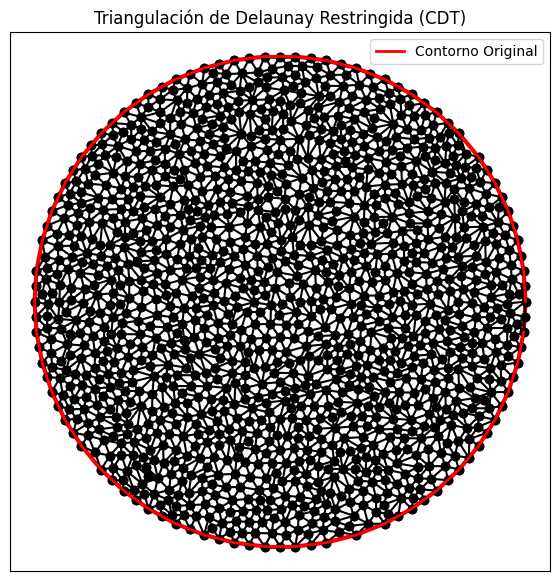

In [32]:
#!pip install triangle
import numpy as np
import triangle as tr
import matplotlib.pyplot as plt

# --- 1. SIMULACIÓN DE LA DISCRETIZACIÓN ---
# Asumimos que estos son los puntos discretizados de tu curva Bézier CERRADA
num_boundary_points = 50
theta = np.linspace(0, 2 * np.pi, num_boundary_points, endpoint=False)
boundary_x = 50 * np.cos(theta)
boundary_y = 50 * np.sin(theta)

# 2. PREPARACIÓN DE DATOS PARA 'triangle'

# 2.1. Vértices (Points)
# Debe ser un arreglo de NumPy de la forma [[x1, y1], [x2, y2], ...]
points = np.vstack((boundary_x, boundary_y)).T

# 2.2. Segmentos (Restricciones)
# Los segmentos son pares de índices que definen los bordes del polígono.
# Para un polígono cerrado, el segmento final conecta el último punto con el primero.
segments = []
for i in range(num_boundary_points):
    # Conecta el punto 'i' con el punto 'i+1' (o 0 si es el último)
    segments.append([i, (i + 1) % num_boundary_points])
segments = np.array(segments)

# 3. CREACIÓN DEL OBJETO DE DATOS DE 'triangle'
# 'A': area máxima de cada triángulo. Se usa para rellenar bien el interior.
# 'p': genera una triangulación de Delaunay Constreñida (CDT).
# 'q': calidad mínima del ángulo (evita triángulos delgados).
A = dict(vertices=points, segments=segments)
flags = 'pq'  # 'p' -> Poligoniza, 'q' -> Calidad del triángulo (evita triángulos angostos)
max_area = 5.0 # Define el área máxima permitida para cada triángulo interno (ajusta el detalle)

# 4. EJECUTAR LA TRIANGULACIÓN RESTRINGIDA
# 'a' se usa para definir el área máxima de los triángulos internos
tria_data = tr.triangulate(A, f'{flags}a{max_area}') 

# 5. GRAFICACIÓN DEL RESULTADO
# Los resultados están en tria_data['vertices'] y tria_data['triangles']

plt.figure(figsize=(7, 7))
ax = plt.gca()
ax.set_aspect('equal')

# Dibuja la malla de la triangulación
tr.plot(ax, **tria_data, show_points=False, show_segment_markers=True)

# Añade el contorno original para referencia
plt.plot(boundary_x, boundary_y, 'r-', lw=2, label="Contorno Original")

plt.title("Triangulación de Delaunay Restringida (CDT)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()